# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

In [3]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(image.content)
images = pd.read_csv("image_predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
tweet = pd.read_json('tweet-json.txt', lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive.shape

(2356, 17)

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
sum(archive.duplicated())

0

In [10]:
archive_names = archive['name'].value_counts()
print(archive_names)

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Toby            7
an              7
Bailey          7
Daisy           7
Buddy           7
Oscar           6
Milo            6
Scout           6
Jax             6
Leo             6
Stanley         6
Jack            6
Bella           6
Rusty           6
Koda            6
Dave            6
Bentley         5
             ... 
Jackie          1
Walker          1
Bluebert        1
Chase           1
Humphrey        1
incredibly      1
Pete            1
Binky           1
Bronte          1
Al              1
Kial            1
Derby           1
Taco            1
Halo            1
Amélie          1
Lupe            1
Devón           1
DayZ            1
Zuzu            1
Arlo            1
Kayla           1
Shooter         1
Tango           1
Buddah          1
Cecil     

In [11]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [15]:
tweet_df = tweet[['id', 'retweet_count', 'favorite_count']]
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
1. archive: timestamp column has wrong data type

2. archive: name column contains rows with non-names, like 'None' and 'a'.

3. images: we will only require 1 type of breed for any future analysis. the entire descision process of the neural network is not necessary.

4. archive: source column contains html tags.

5. there are more rows in the archive, than there are images. 

6. archive contains columns that are not vital for the analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id).

7. archive: has duplicate tweets(retweetes).

8. archive: text column contains hyperlinks.

9. there are some observations with decimal ratings in dog ratings

### Tidiness issues
1. the data doesn't have to be divided into 3 datasets.

2. Column headers contain variables (doggo, flooder, pepper, puppy)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
df1 = archive
df2 = images
df3 = tweet_df

### Issue #1:

#### The data doesn't have to be divided into 3 datasets.

#### Code

In [18]:
df_merged = pd.concat([df1, df2, df3], axis=1, join="inner")

#### Test

In [19]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,9774,41048


### Issue #2:

#### Define: Timestamp column has wrong data type

#### Code

In [20]:
df_merged['timestamp']= pd.to_datetime(df_merged['timestamp'])

#### Test

In [21]:
df_merged.info('timestamp')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 32 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2019 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
tweet_id                

### Issue #3:

#### Define: Column headers contain variables (doggo, flooder, pepper, puppy)

#### Code

In [22]:
df_merged.replace('None', '', inplace=True)
df_merged['stage'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo
df_merged.loc[df_merged.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_merged.loc[df_merged.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_merged.loc[df_merged.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
df_merged.loc[df_merged.stage == '', 'stage'] = np.nan

#### Test

In [23]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,9774,41048,NaN


#### Test

### Issue #4:

#### Define: archive contains columns that are not vital for the analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id)

#### Code

In [24]:
df_merged.drop(['jpg_url', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo', 'tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 20 columns):
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
id                    2075 non-null int64
retweet_count         2075 non-null int64
favorite_count        2075 non-null int64
stage                 380 non-null object
dtypes: bool(3), datetime64[ns](1),

### Issue #5:

#### Define: Name column contains rows with non-names, like 'None' and 'a'.

#### Code

In [26]:
mask = df_merged.name.str.islower() 
column_name = 'name' 
df_merged.loc[mask, column_name] = np.nan
df_merged.loc[df_merged.name == '', 'name'] = np.nan
df_names = df_merged['name'].value_counts()
print(df_names)

Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Bo           9
Penny        9
Tucker       9
Winston      8
Sadie        8
Buddy        7
Toby         7
Bailey       7
Jack         6
Leo          6
Bella        6
Daisy        6
Stanley      6
Milo         6
Jax          6
Oscar        6
Dave         5
Gus          5
Louis        5
Koda         5
Sunny        5
Bentley      5
Phil         5
Sammy        5
Rusty        5
            ..
Vixen        1
Chubbs       1
Severus      1
Karma        1
Mo           1
Jackie       1
Walker       1
Bluebert     1
Carper       1
Mojo         1
Glacier      1
Beckham      1
Cedrick      1
Blakely      1
Binky        1
Al           1
Derby        1
Taco         1
Halo         1
Lupe         1
Devón        1
Dudley       1
Stewie       1
Zuzu         1
Kayla        1
Shooter      1
Tango        1
Buddah       1
Cecil        1
Franq        1
Name: name, Length: 836, dtype: int64


#### Test

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 20 columns):
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1352 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
id                    2075 non-null int64
retweet_count         2075 non-null int64
favorite_count        2075 non-null int64
stage                 380 non-null object
dtypes: bool(3), datetime64[ns](1),

### Issue #6:

#### Define: We will only require 1 type of breed for any future analysis. the entire descision process of the neural network is not necessary.

#### Code

In [28]:
df_merged.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)
df_merged.loc[df_merged['p1_dog'] == False, 'p1'] = 'other'

#### Test

In [29]:
df_merged.drop(['p1_conf', 'p1_dog'], axis = 1, inplace = True)
df_merged.rename(columns={"p1": "breed"}, inplace = True)
df__dog_names = df_merged['breed'].value_counts()
print(df__dog_names)

other                          543
golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
cocker_spaniel                  30
malamute                        30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       20
Cardigan                        19
Eskimo_dog                      18
Maltese_dog                     18
beagle                          18
Shetland_sheepdog               18
Shih-Tzu                        17
Lakeland_terrier                17
Rottweiler                      17
kuvasz                          16
Italian_greyhound               16
Great_Pyrenees      

### Issue #7:

#### Timestamp column has wrong data type.

#### Code

In [30]:
df_merged['timestamp']= pd.to_datetime(df_merged['timestamp'])

#### Test

In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1352 non-null object
img_num               2075 non-null int64
breed                 2075 non-null object
id                    2075 non-null int64
retweet_count         2075 non-null int64
favorite_count        2075 non-null int64
stage                 380 non-null object
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 194.6+ KB


### Issue #8:

#### Define: Source column contains html tags.

#### Code

In [32]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df_merged['source'] = df_merged['source'].apply(lambda x : remove_tags(x))

In [33]:
df_names = df_merged['name'].value_counts()
print(df_names)

Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Bo           9
Penny        9
Tucker       9
Winston      8
Sadie        8
Buddy        7
Toby         7
Bailey       7
Jack         6
Leo          6
Bella        6
Daisy        6
Stanley      6
Milo         6
Jax          6
Oscar        6
Dave         5
Gus          5
Louis        5
Koda         5
Sunny        5
Bentley      5
Phil         5
Sammy        5
Rusty        5
            ..
Vixen        1
Chubbs       1
Severus      1
Karma        1
Mo           1
Jackie       1
Walker       1
Bluebert     1
Carper       1
Mojo         1
Glacier      1
Beckham      1
Cedrick      1
Blakely      1
Binky        1
Al           1
Derby        1
Taco         1
Halo         1
Lupe         1
Devón        1
Dudley       1
Stewie       1
Zuzu         1
Kayla        1
Shooter      1
Tango        1
Buddah       1
Cecil        1
Franq        1
Name: name, Length: 836, dtype: int64


#### Test

In [34]:
df_merged.head()

,timestamp,source,text,rating_numerator,rating_denominator,name,img_num,breed,id,retweet_count,favorite_count,stage
0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,Welsh_springer_spaniel,892420643555336193,8853,39467,NaN
1,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,redbone,892177421306343426,6514,33819,NaN
2,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1,German_shepherd,891815181378084864,4328,25461,NaN
3,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1,Rhodesian_ridgeback,891689557279858688,8964,42908,NaN
4,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1,miniature_pinscher,891327558926688256,9774,41048,NaN


### Issue #9:

#### Define: Text column contains hyperlinks.

#### Code

In [35]:
df_merged['text'] = df_merged['text'].apply(lambda x : remove_tags(x))

#### Test

In [36]:
df_merged.head()

,timestamp,source,text,rating_numerator,rating_denominator,name,img_num,breed,id,retweet_count,favorite_count,stage
0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,Welsh_springer_spaniel,892420643555336193,8853,39467,NaN
1,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,redbone,892177421306343426,6514,33819,NaN
2,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1,German_shepherd,891815181378084864,4328,25461,NaN
3,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1,Rhodesian_ridgeback,891689557279858688,8964,42908,NaN
4,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1,miniature_pinscher,891327558926688256,9774,41048,NaN


### Issue #10:

#### Define: There are more rows in the archive, than there are images.

I have actually already completed this step in Issue #1, when joining datasets. All datasets withouht images were not joined, so only those rows with images remained.

### Issue #11:

#### Define: For dog ratings, there are some observations with decimal ratings

#### Code

In [37]:
df_merged[df_merged.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [38]:
twitter_archive_master = df_merged
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [39]:
df_sources = df_merged['source'].value_counts()
print(df_sources)

Twitter for iPhone     1962
Vine - Make a Scene      90
Twitter Web Client       12
TweetDeck                11
Name: source, dtype: int64


In [40]:
stage_insight = df_merged[["stage", "retweet_count"]].groupby("stage").mean()
print(stage_insight)

               retweet_count
stage                       
doggo            5381.530120
doggo,floofer    6403.000000
doggo,pupper     3044.583333
doggo,puppo      5943.000000
floofer          3191.111111
pupper           2786.106122
puppo            5588.275862


In [41]:
br_insight = df_merged[["breed", "rating_numerator"]].groupby("breed").mean()
br_sorted = br_insight.sort_values("rating_numerator", ascending=False)
br_sorted.head()

,rating_numerator
breed,
Gordon_setter,248.500000
Blenheim_spaniel,170.545455
Brabancon_griffon,147.333333
Airedale,65.666667
Sussex_spaniel,36.500000


In [42]:
name_insight = df_merged[["name", "favorite_count"]].groupby("name").mean()
name_sorted = name_insight.sort_values("favorite_count", ascending=False)
name_sorted.head()

,favorite_count
name,
Harvey,131075.0
Lili,106827.0
Albus,74372.5
Jersey,66437.0
Ollie,55686.5


### Insights:
1. Doggo is the most retweeted dog stage.

2. Gordon_setter is the highest rated dog breed.

3. Harvey is the most favorited dog name.

### Visualization

In [43]:
plot_df = name_insight.loc[(name_insight['favorite_count'] >= 50000)].reset_index()
plot_df

,name,favorite_count
0,Albus,74372.5
1,Harvey,131075.0
2,Jersey,66437.0
3,Lili,106827.0
4,Ollie,55686.5
5,Rey,51522.0


Text(0,0.5,'Favorite Count')

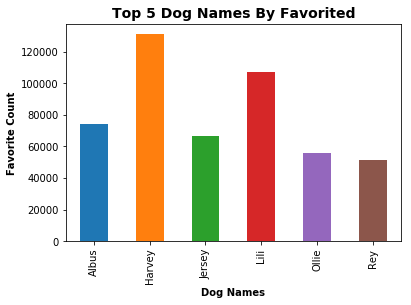

In [44]:
plot_df.plot(kind='bar', x='name',y='favorite_count', legend = False)
plt.title('Top 5 Dog Names by Favorited'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Dog Names'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Favorite Count'.title(),
               fontsize = 10, weight = "bold")